In [38]:
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division

In [39]:
# Import definitions of the environments.
import RL_worlds as worlds

# Import helper functions for plotting.
from plot_util import *

In [50]:
def init_state(params):
    """
    Initialize the state at the beginning of an episode.
    Args:
        params: a dictionary containing the default parameters.
    Returns:
        an integer corresponding to the initial state.
    """
    if params['environment'].name == 'windy_cliff_grid':
        return 0
    elif params['environment'].name == 'n_armed_bandit':
        return 0
    elif params['environment'].name == 'cheese_world':
        return 0
    elif params['environment'].name == 'cliff_world':
        return 0
    elif params['environment'].name == 'quentins_world':
        return 54

def update_state(state, action, params):
    """
    State transition based on world, action and current state.
    Args:
        state: integer corresponding to the current state.
        action: integer corresponding to the action taken.
        params: a dictionary containing the default parameters.
    Returns:
        an integer corresponding to the next state;
        an integer corresponding to the reward received.
    """
    next_state, reward = params['environment'].get_outcome(state, action)
    return next_state, reward
    
def call_policy(state, value, params):
    """
    Call a policy to choose actions, given current state and value function.
    Args:
        state: integer corresponding to the current state.
        value: a matrix indexed by state and action.
        params: a dictionary containing the default parameters.
    Returns:
        an integer corresponding action chosen according to the policy.
    """
    # multiple options for policy
    if params['policy'] == 'epsilon_greedy':
        return epsilon_greedy(state, value, params)
    elif params['policy'] == 'softmax':
        return softmax(state, value, params)
    else: # random policy (if policy not recognized, choose randomly)
        return randint(params['environment'].n_actions)

def update_value(prev_state, action, reward, state, value, params):
    """
    Update the value function.
    Args:
        prev_state: an integer corresponding to the previous state.
        action: an integer correspoding to action taken.
        reward: a float corresponding to the reward received.
        state: an integer corresponding to the current state;
          should be None if the episode ended.
        value: a matrix indexed by state and action.
        params: a dictionary containing the default parameters. 
    Returns:
        the updated value function (matrix indexed by state and action).
    """
    if params['learning_rule'] == 'q_learning':
        # off policy learning
        return q_learning(prev_state, action, reward, state, value, params)
    elif params['learning_rule'] == 'sarsa':
        # on policy learning
        return sarsa(prev_state, action, reward, state, value, params)
    else:
        print('Learning rule not recognized')

def default_params(environment):
    """
    Define the default parameters.
    Args:
        environment: an object corresponding to the environment.
    Returns:
        a dictionary containing the default parameters, where the keys
            are strings (parameter names).
    """
    params = dict()
    params['environment'] = environment
    
    params['alpha'] = 0.1  # learning rate    
    params['beta'] = 10  # inverse temperature    
    params['policy'] = 'epsilon_greedy'
    params['epsilon'] = 0.05  # epsilon-greedy policy
    params['learning_rule'] = 'q_learning'
    params['epsilon_decay'] = 0.9
    
    if environment.name == 'windy_cliff_grid':
        params['gamma'] = 0.6  # temporal discount factor
    elif environment.name == 'n_armed_bandit':
        params['gamma'] = 0.9  # temporal discount factor
    elif environment.name == 'cliff_world':
        params['gamma'] = 1.0  # no discounting
    elif environment.name == 'cheese_world':
        params['gamma'] = 0.5  # temporal discount factor
    elif environment.name == 'quentins_world':
        params['gamma'] = 0.9  # temporal discount factor

    return params

In [51]:
def epsilon_greedy(state, value, params):
    if np.all(np.array(value[state, :]) == 0):
        a = np.random.randint(params["environment"].n_actions)
    elif np.random.rand() < 1 - params["epsilon"]: 
        a = argmax(value[state, :])
    else:
        a = np.random.randint(params["environment"].n_actions)
    return a

In [56]:
def mcts(state, Q, params):
    env = params["environment"]
    Q = np.zeros((env.n_states, env.n_actions))
    for i in range(params["n_mcts"]):
        s, record = state, []
        for step in range(params["n_steps"]):
            a = call_policy(s, Q, params)
            s_next, reward = update_state(s, a, params)
            record.append((s, a))
            s = s_next
            if s == None: break
        print reward
        for (s, a) in record:
#             Q[s, a] = (1 - params["alpha"]) * Q[s, a] + params["alpha"] * reward
#             
            Q[s, a] += reward / params["n_mcts"]
    return Q 

In [57]:
def run_rl(params):
    env = params["environment"]
    Q = np.random.rand(env.n_states, env.n_actions) #sparse.lil_matrix((env.n_states, env.n_actions))
    for episode in range(params["n_episodes"]):
        state = init_state(params)
        reward_sum = 0
        for step in range(params["n_steps"]):
            Q = mcts(state, Q, params)
            action = call_policy(state, Q, params)
            next_state, reward = update_state(state, action, params)
            reward_sum += reward  
            state = next_state
            if state == None: break
        rewards.append(reward_sum)
    return Q, rewards

In [58]:
def plot_rl(params, value, rewards):
#     plot_state_action_values(params["environment"], value)
    plot_quiver_max_action(params["environment"], value)
#     plot_heatmap_max_val(params["environment"], value)
#     plot_rewards(len(rewards), rewards)
    plt.figure()
    plt.plot(rewards)
    plt.show()

-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
0
0
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
-100
-100
-100
0
0
-100
-100
-100
0
-100
-100
0
0
0
-100
0
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
0
0
0
0
0
0
0
-100
-100
0
-100
-100
-100
-100
0
-100
-100
-100
-100
0
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
0
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
-100
0
-100
0
0
0
0
0
0
0
-100
0
0
0
0
0
-100
0
0
0
0
0
0
0
-100
0
0
0
0
-100
0
0
0
0
0
0
-100
-100
0
0
0
0
0
0
0
0
-100
0
0
0
-100
0
0
0
0
0
0
-100
-100
0
0
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
-100
-100
-100
-100
-100
-100
0
0
-100
-100
0
0
0
0
0
0
0
-100
0
0
0
0
-100
-100
0
0
0
-100
0
-100
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
0
0
-100
0
0
-100
0
-100
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
-100
-100
-100
-100
-100
-100
0
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
-100
-100
-100
-100
-100
-100
0
0
0
0
-100
-100
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
-100
-100
0
-100
0
0
0
0
0
0
0
0
-100
0
-100
0
0
0
-100
0
-100
0
-100
0
0
0
0
0
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
0
-100
0
-100
0
-100
-100
0
-100
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
-100
0
0
0
-100
0
0
0
-100
-100
-100
-1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0


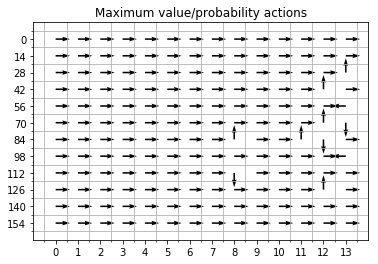

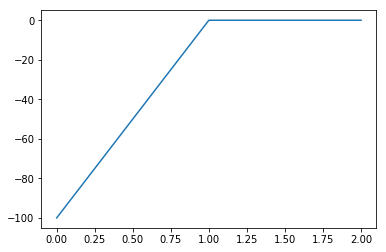

In [59]:
params = default_params(worlds.windy_cliff_grid_2())
params["epsilon"] = 0.1
params["alpha"] = 0.1
params["n_mcts"] = 100
params["n_episodes"] = 3
params["n_steps"] = 100
Q, rewards = run_rl(params)
plot_rl(params, Q, rewards)